In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset with names, as they have no column names
df = pd.read_csv('car_evaluation.csv', names=['Price', 'Maintenance', 'Doors', 'Passengers', 'Luggage', 'Safety', 'Evaluation'])

In [3]:
print(df.shape)

(1728, 7)


In [4]:
# Explore the data
print(df.head())

   Price Maintenance Doors Passengers Luggage Safety Evaluation
0  vhigh       vhigh     2          2   small    low      unacc
1  vhigh       vhigh     2          2   small    med      unacc
2  vhigh       vhigh     2          2   small   high      unacc
3  vhigh       vhigh     2          2     med    low      unacc
4  vhigh       vhigh     2          2     med    med      unacc


In [5]:
# Explore the data
print(df.tail())

     Price Maintenance  Doors Passengers Luggage Safety Evaluation
1723   low         low  5more       more     med    med       good
1724   low         low  5more       more     med   high      vgood
1725   low         low  5more       more     big    low      unacc
1726   low         low  5more       more     big    med       good
1727   low         low  5more       more     big   high      vgood


In [6]:
print(df.describe())

        Price Maintenance Doors Passengers Luggage Safety Evaluation
count    1728        1728  1728       1728    1728   1728       1728
unique      4           4     4          3       3      3          4
top     vhigh       vhigh     2          2   small    low      unacc
freq      432         432   432        576     576    576       1210


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price        1728 non-null   object
 1   Maintenance  1728 non-null   object
 2   Doors        1728 non-null   object
 3   Passengers   1728 non-null   object
 4   Luggage      1728 non-null   object
 5   Safety       1728 non-null   object
 6   Evaluation   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [8]:
# Count duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()

# Print the count of duplicate rows
print("Duplicate Rows:", duplicate_count)

# Drop duplicates
df.drop_duplicates(inplace=True)

Duplicate Rows: 0


In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())
df.dropna(inplace=True)


Missing Values:
Price          0
Maintenance    0
Doors          0
Passengers     0
Luggage        0
Safety         0
Evaluation     0
dtype: int64


In [10]:
print(f"Cleaned dataset shape: {df.shape}")

Cleaned dataset shape: (1728, 7)


In [11]:
# # Save the cleaned and clustered dataset to a new CSV file
df.to_csv('cleaned_car_evaluation.csv', index=False)

# Encoding Data.

In [12]:
# Encode categorical variables
encoders = {}

In [13]:
for col in df.select_dtypes(include=['object']).columns:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

In [14]:
# Select relevant columns for modeling
X = df[['Price', 'Maintenance', 'Doors', 'Passengers', 'Luggage', 'Safety']]

In [15]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering an unsupervised machine learning model

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [17]:
# Build the model
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [18]:
# Assign cluster labels to the data points
df['Cluster'] = kmeans.labels_

In [19]:
# Display the cluster centers
print("\nCluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=X.columns))


Cluster Centers:
          Price  Maintenance     Doors  Passengers  Luggage    Safety
0  1.227156e-17    -0.894427  0.838525    0.344459  0.00000 -0.344459
1 -2.981424e-02     0.983870  0.745356   -0.097980 -0.01633  0.097980
2  2.981424e-02     0.387585 -0.971944    0.457238  0.01633 -0.457238
3  6.582920e-18    -0.616430 -0.495561   -0.662024  0.00000  0.662024


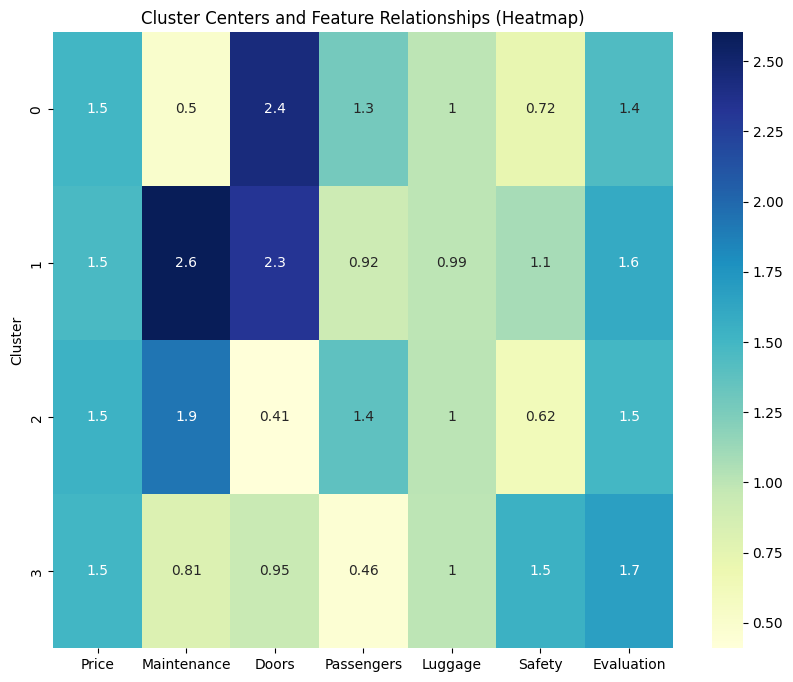

In [20]:
# Create a heatmap to visualize the relationships between features and clusters
plt.figure(figsize=(10, 8))
sns.heatmap(df.groupby('Cluster').mean(), annot=True, cmap='YlGnBu')
plt.title('Cluster Centers and Feature Relationships (Heatmap)')
plt.show()

# Dimensionality reduction using PCA
1. Dimensionality reduction was conducted using PCA inorder to reduce the number of features while retaining most of the important information. 
2. PCA also transforms original into a lower dimensional space allowing us to visualize the data in a heatmap. 

In [21]:
# Perform dimensionality reduction using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [22]:
# Combine PCA components and cluster labels into a DataFrame
df_pca = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2'])
df_pca['Cluster'] = kmeans.labels_

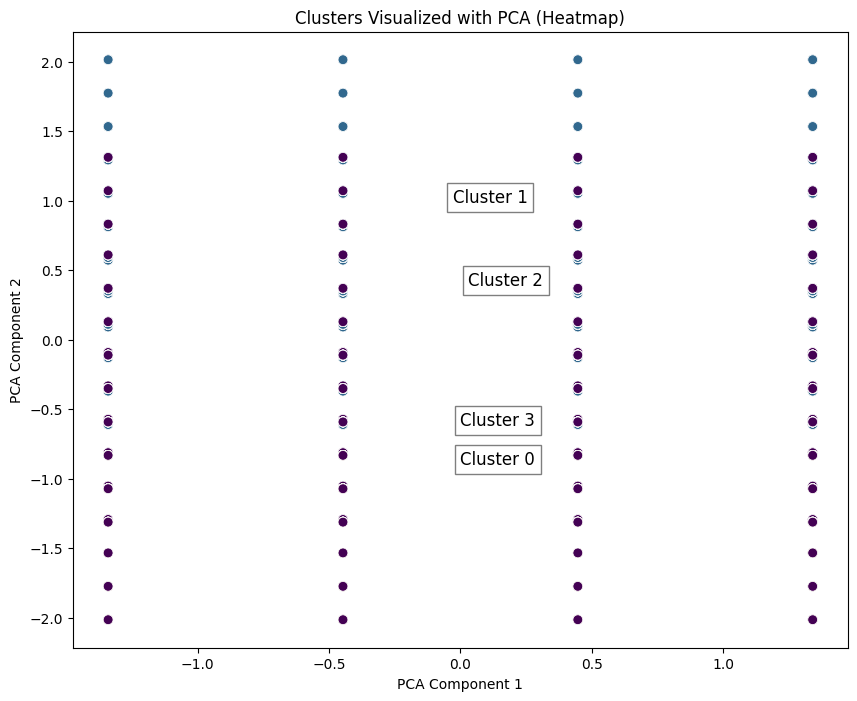

In [23]:
# Create a heatmap to visualize clusters with PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Cluster', data=df_pca, palette='viridis', s=50, legend=None)
plt.title('Clusters Visualized with PCA (Heatmap)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add annotations for cluster centers
for i in range(len(kmeans.cluster_centers_)):
    plt.text(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], f'Cluster {i}', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()

In [24]:
# Evaluate using silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"\nSilhouette Score: {silhouette_avg}")


Silhouette Score: 0.11467832171454509


In [25]:
# Make two new records with reasonable values
new_predics = pd.DataFrame({
    'Price': ['vhigh', 'low'],
    'Maintenance': ['vhigh', 'low'],
    'Doors': [2, 2],
    'Passengers': [2, 2],
    'Luggage': ['small', 'big'],
    'Safety': ['low', 'low']
})

In [26]:
# Encode categorical variables in new records
for col in new_predics.select_dtypes(include=['object']).columns:
    if col in encoders:
        new_predics[col] = encoders[col].transform(new_predics[col])

In [27]:
# Feature scaling for new records
new_records_scaled = scaler.transform(new_predics)

In [28]:
predicted_clusters = kmeans.predict(new_records_scaled)
print("\nPredicted Clusters for New Records:")
print(predicted_clusters)


Predicted Clusters for New Records:
[1 0]


In [29]:
# Evaluate using silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"\nSilhouette Score: {silhouette_avg}")


Silhouette Score: 0.11467832171454509


Predicted Clusters for New Records:
The predicted clusters for the new records are [1 0].
This means that both one set of records were assigned to cluster 1 by the KMeans clustering algorithm, the other to cluster 0.

Silhouette Score:
The silhouette score of 0.11467 indicates the quality of the clustering.
This suggests that the clusters might not be well-separated or distinct.

In [31]:
# Reverse transform the predicted clusters to human-readable form
predicted_clusters_readable = encoders[col].inverse_transform(predicted_clusters)
print("\nPredicted Clusters for New Records (Human-Readable):")
print(predicted_clusters_readable)


Predicted Clusters for New Records (Human-Readable):
['low' 'high']
